# MintPy Processing

## Setup

In [16]:
# %matplotlib widget
%matplotlib inline
import glob
import sys
import shutil
import os
import matplotlib.pyplot as plt
from mintpy.utils import readfile
from mintpy import workflow, view, tsview, plot_network, plot_transection, plot_coherence_matrix
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity

In [37]:
cd /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2


In [38]:
mkdir mintpy

In [39]:
cd /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2


In [40]:
!nproc

32


In [41]:
# ~30 GB of ram
!cat /proc/meminfo

MemTotal:       131447096 kB
MemFree:        36839388 kB
MemAvailable:   44819836 kB
Buffers:           12904 kB
Cached:          5211092 kB
SwapCached:        16564 kB
Active:          4239864 kB
Inactive:        4184356 kB
Active(anon):    1858452 kB
Inactive(anon):  1419040 kB
Active(file):    2381412 kB
Inactive(file):  2765316 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:       4194296 kB
SwapFree:        3706360 kB
Dirty:                12 kB
Writeback:             0 kB
AnonPages:       3196788 kB
Mapped:           114768 kB
Shmem:             77268 kB
Slab:           27500564 kB
SReclaimable:    3459788 kB
SUnreclaim:     24040776 kB
KernelStack:       20096 kB
PageTables:        29908 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    69917844 kB
Committed_AS:   22493432 kB
VmallocTotal:   34359738367 kB
VmallocUsed:     3511504 kB
VmallocChunk:   34287310752 kB
Percpu:            81920 kB
HardwareCorru

## A note on the los files:

**From Eric:** Checked the geom_reference/los.rdr file and it is actually BSQ, but the los.rdr.xml file has the scheme as BIP. This explains why MintPy is reading it wrong. Hand-edited the xml file and ran fixImageXml.py to generate the corrected los.rdr.vrt file. Also edited the los.rdr.rsc file to correct the scheme there.

## load_data

In [42]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep load_data

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-13 19:54:48.963854--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
copy default template file /home/fwilliam/tools/MintPy/mintpy/defaults/smallbaselineApp.cfg to work directory
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
   

In [26]:
# !info.py inputs/ifgramStack.h5

## Check for correct loading of incidence angle

view.py inputs/geometryRadar.h5 azimuthAngle incidenceAngle --noverbose


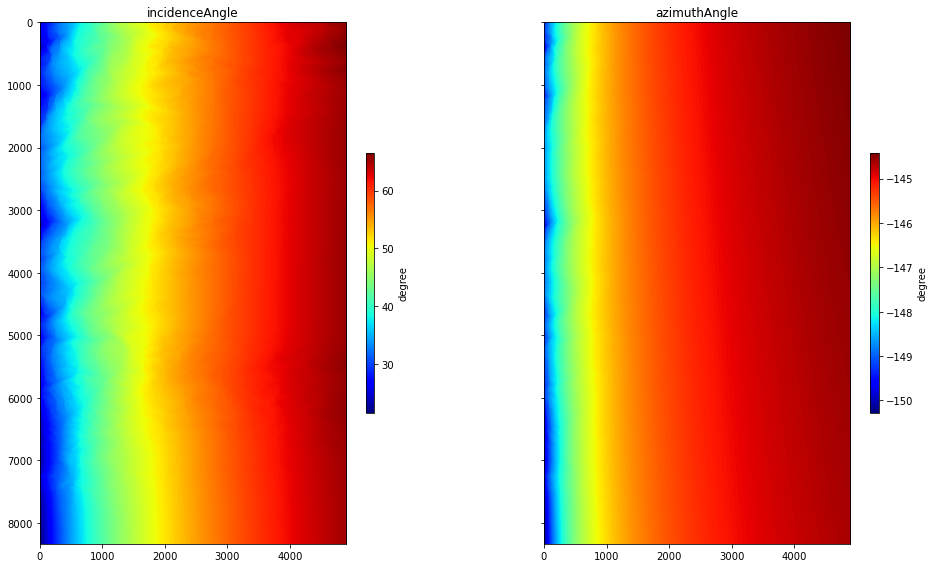

In [43]:
fig = view.main('inputs/geometryRadar.h5 azimuthAngle incidenceAngle --noverbose'.split())

Outputs look good, don't need to edit the xml files!

## Generate Water Mask

input geometry file: ./inputs/geometryRadar.h5
read ./inputs/geometryRadar.h5 waterMask
create initial mask with the same size as the input file and all = 1
all pixels with nan value = 0
exclude pixels with value < 0.5
create HDF5 file: waterMask.h5 with w mode
create dataset /mask of bool       in size of (8333, 4892)         with compression=None
finished writing to waterMask.h5
time used: 00 mins 0.5 secs.
view.py waterMask.h5 --noverbose


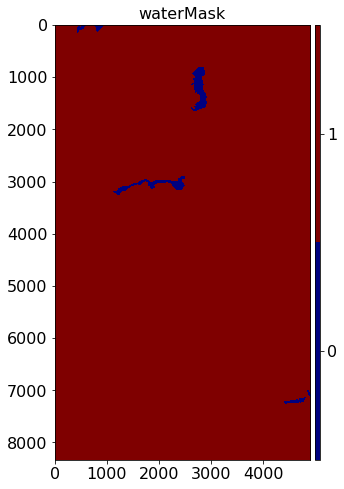

In [44]:
!generate_mask.py ./inputs/geometryRadar.h5 waterMask -m 0.5 -o waterMask.h5
view.main('waterMask.h5 --noverbose'.split())

## modify_network

There are quite a few interferograms with large phase differences, but for now let's just remove interferograms with phase discontinuities [0,2,18]. For more information on why this decision was made, see `network_selection.ipynb`

In [45]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep modify_network

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-13 20:01:36.230670--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['modify_network']
Remaining steps: ['reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cf

view.py ./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -20 20 --noverbose


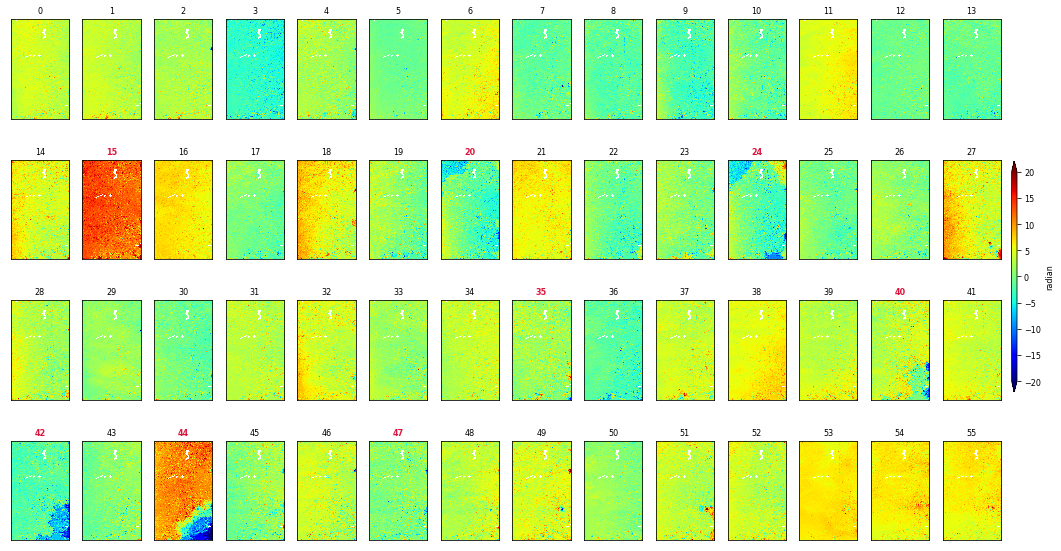

In [46]:
view.main('./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -20 20 --noverbose'.split())

read options from template file: Haywrd_05502_01-S2.cfg
read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
['coherenceSpatialAvg.txt'] exists and is newer than ['./inputs/ifgramStack.h5', 'waterMask.h5'] --> skip.
coherenceSpatialAvg.txt already exists, read it directly
number of acquisitions: 20
number of interferograms: 56
shift all perp baseline by 0.0 to zero mean for plotting
--------------------------------------------------
number of interferograms marked as drop: 8
number of interferograms marked as keep: 48
number of acquisitions marked as drop: 0


/home/fwilliam/tools/MintPy/mintpy/utils/plot.py:464: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([ymin, ymax])


max perpendicular baseline: 0.00 m
max temporal      baseline: 798.0 days
showing coherence
data range: [0.3737, 0.8494]
display range: (0.2, 1.0)
showing ...


/home/fwilliam/tools/MintPy/mintpy/utils/plot.py:464: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([ymin, ymax])


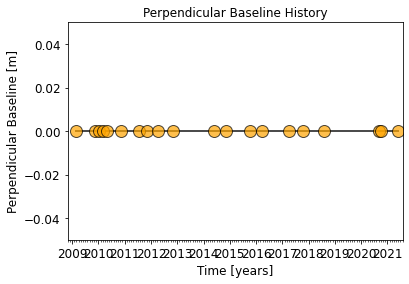

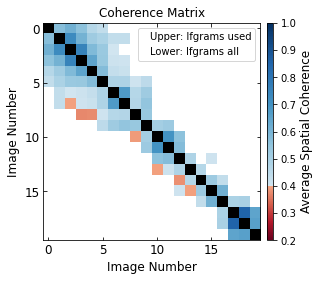

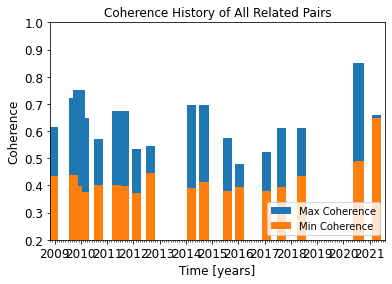

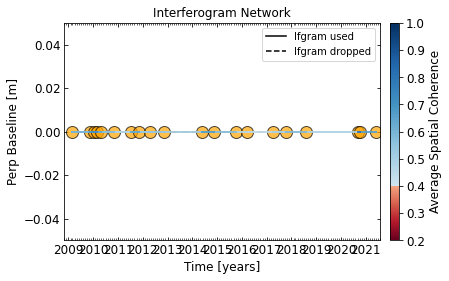

In [47]:
plot_network.main('./inputs/ifgramStack.h5 -t ../JPL_internship/Haywrd_05502_01-S2.cfg'.split())

Dropped 8 of 54 interferograms, but still have fully connected network with avgSpatialCoh > 0.4 threshold

## reference_point

view.py inputs/geometryRadar.h5 height --noverbose


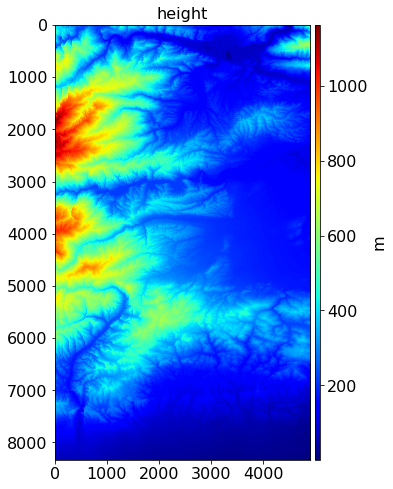

In [52]:
view.main('inputs/geometryRadar.h5 height --noverbose'.split())

view.py avgSpatialCoh.h5 --sub-x 2500 4890 --sub-y 0 4000 --noverbose


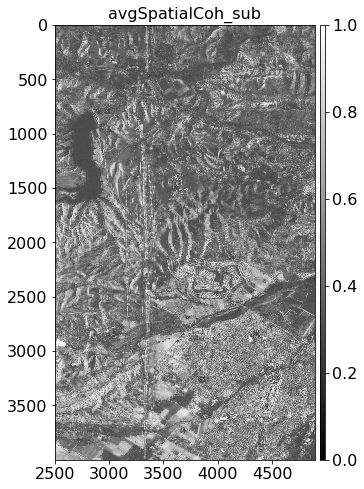

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
# view.main('avgSpatialCoh.h5 --noverbose'.split())
view.main('avgSpatialCoh.h5 --sub-x 2500 4890 --sub-y 0 4000 --noverbose'.split())

In [64]:
!reference_point.py inputs/ifgramStack.h5 --reset
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep reference_point

remove REF_Y/X and/or REF_LAT/LON from file: inputs/ifgramStack.h5
All updated (removed) attributes already exists (do not exists) and have the same value, skip update.
Done.
MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-13 20:29:05.722007--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['reference_point']
Remaining steps: ['quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template 

## quick_overview

In [65]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep quick_overview

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-13 20:29:54.969677--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['quick_overview']
Remaining steps: ['correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-

view.py avgPhaseVelocity.h5 --noverbose -m waterMask.h5 --vlim -3 3


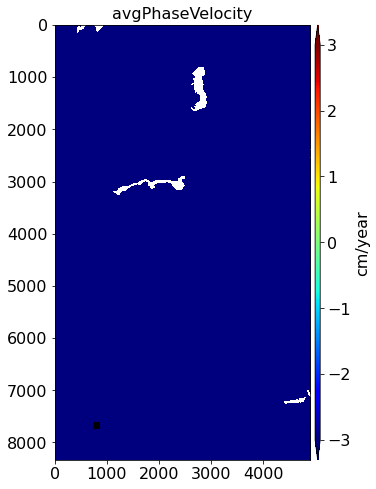

plot and save figure to file numTriNonzeroIntAmbiguity.png


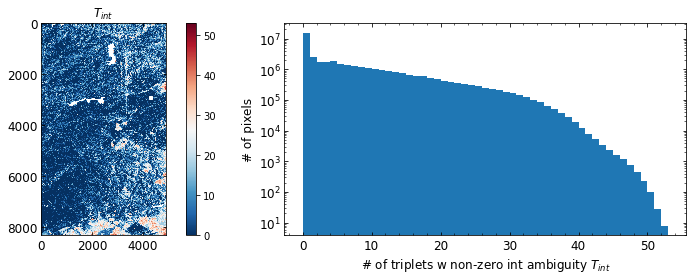

In [67]:
view.main('avgPhaseVelocity.h5 --noverbose -m waterMask.h5 --vlim -3 3'.split())
plot_num_triplet_with_nonzero_integer_ambiguity('numTriNonzeroIntAmbiguity.h5', display=True, fig_size=[12, 4])

## correct_unwrap_error

In [68]:
!generate_mask.py inputs/ifgramStack.h5 --nonzero -o maskConnComp.h5

input ifgramStack file: inputs/ifgramStack.h5
calculate the common mask of pixels with non-zero connectComponent value
[==================================================] 48/48   13s /     0s 
delete exsited file: maskConnComp.h5
create HDF5 file: maskConnComp.h5 with w mode
create dataset /mask of bool       in size of (8333, 4892)         with compression=None
finished writing to maskConnComp.h5


In [69]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep correct_unwrap_error

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-13 20:36:16.485864--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['correct_unwrap_error']
Remaining steps: ['invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/

## invert_network
This takes a while so we write it to a log

In [ ]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep invert_network |& tee -i invert.log ; python ../JPL_internship/emailme.py

In [71]:
!cat invert.log

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-13 20:36:28.384184--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['invert_network']
Remaining steps: ['correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_055

## correct_LOD

In [72]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep correct_LOD

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:47:45.266361--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['correct_LOD']
Remaining steps: ['correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/s

## correct_SET

In [73]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep correct_SET

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:47:50.360638--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['correct_SET']
Remaining steps: ['correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp

## correct_troposphere

In [74]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep correct_troposphere

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:47:56.996727--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['correct_troposphere']
Remaining steps: ['deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


********

## deramp

In [75]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep deramp

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:48:01.998127--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['deramp']
Remaining steps: ['correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


******************** step - der

## correct_topography

In [76]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep correct_topography

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:49:08.657372--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['correct_topography']
Remaining steps: ['residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


******************** step - correct_topog

## residual_RMS

In [77]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep residual_RMS

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:50:01.578901--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['residual_RMS']
Remaining steps: ['reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


******************** step - residual_RMS ********************
N

## reference_date

In [78]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep reference_date

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:50:07.624186--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['reference_date']
Remaining steps: ['velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


******************** step - reference_date ********************

reference_date

## velocity

In [ ]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep velocity |& tee -i velocity.log ; python ../JPL_internship/emailme.py

In [80]:
!cat velocity.log

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 12:50:11.500033--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['velocity']
Remaining steps: ['geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


******************** step - velocity ********************

timeseries2velocity.py /u/sar-r2/fwill

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



## geocode

In [81]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep geocode

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 19:31:37.938855--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['geocode']
Remaining steps: ['google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


******************** step - geocode ********************

geocode.py /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/H

## google_earth

In [82]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S2.cfg --dostep google_earth

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-09-14 19:36:12.800288--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
Run routine processing with smallbaselineApp.py on steps: ['google_earth']
Remaining steps: ['hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S2
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/JPL_internship/Haywrd_05502_01-S2.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/smallbaselineApp.cfg


******************** step - google_earth ********************
creating Google Earth KMZ file for geocoded velocity file:

## Export to GDAL

In [83]:
!save_gdal.py ./geo/geo_velocity.h5 -o ./geo/velocity.tif

read metadata from file: ./geo/geo_velocity.h5
read data     from file: ./geo/geo_velocity.h5
initiate GDAL driver: GeoTIFF
create raster band
raster row / column number: 8333, 4892
raster transform info: (-121.93809511149205, 0.00010684896066276069, 0, 37.81271990319598, 0, -4.307787634693426e-05)
write data to raster band
set projectection as: EPSG 4326
finished writing to /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S2/mintpy2/geo/velocity.tif


## View Results

### Dem with velocity overlay

view.py ./geo/geo_velocity.h5 velocity --dem ./geo/geo_geometryRadar.h5 --shade-exag 0.05 --figsize 12 12 --notitle --notick --noaxis --noverbose --vlim -2 2 -o velocity_dem.png


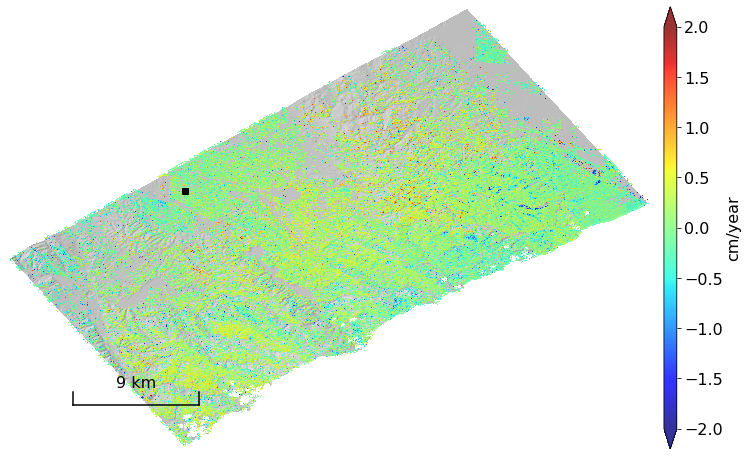

In [84]:
view.main('./geo/geo_velocity.h5 velocity --dem ./geo/geo_geometryRadar.h5 --shade-exag 0.05 --figsize 12 12 --notitle --notick --noaxis --noverbose --vlim -2 2 -o velocity_dem.png'.split())

### Temporal Coherence

view.py temporalCoherence.h5 --noverbose


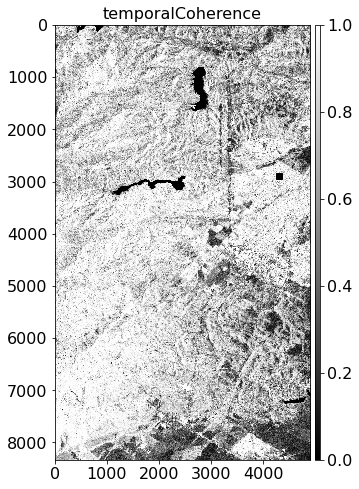

In [85]:
view.main('temporalCoherence.h5 --noverbose'.split())

### Phase Ambiguity

plot and save figure to file numTriNonzeroIntAmbiguity.png


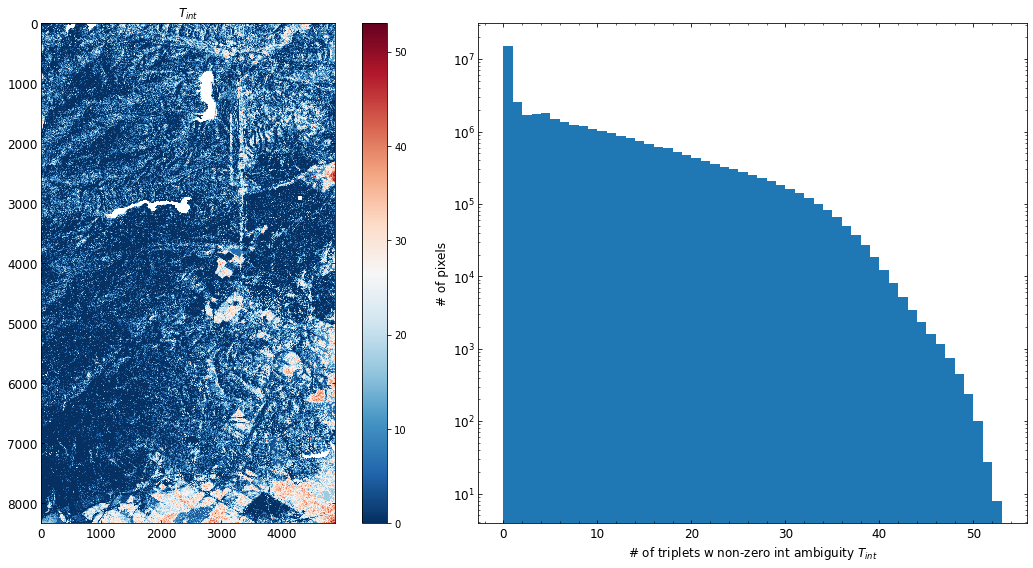

In [86]:
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity
plot_num_triplet_with_nonzero_integer_ambiguity('numTriNonzeroIntAmbiguity.h5', display=True, fig_size=[16, 8])

### Velocity with VelocityStd

view.py velocity.h5 --noverbose


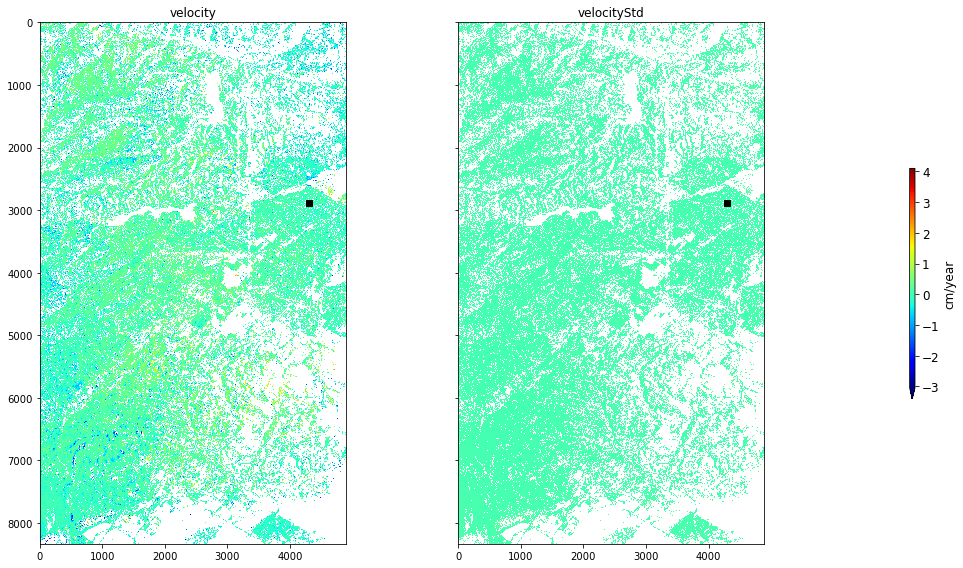

In [87]:
view.main('velocity.h5 --noverbose'.split())

view.py velocity.h5 --noverbose --vlim -2 2


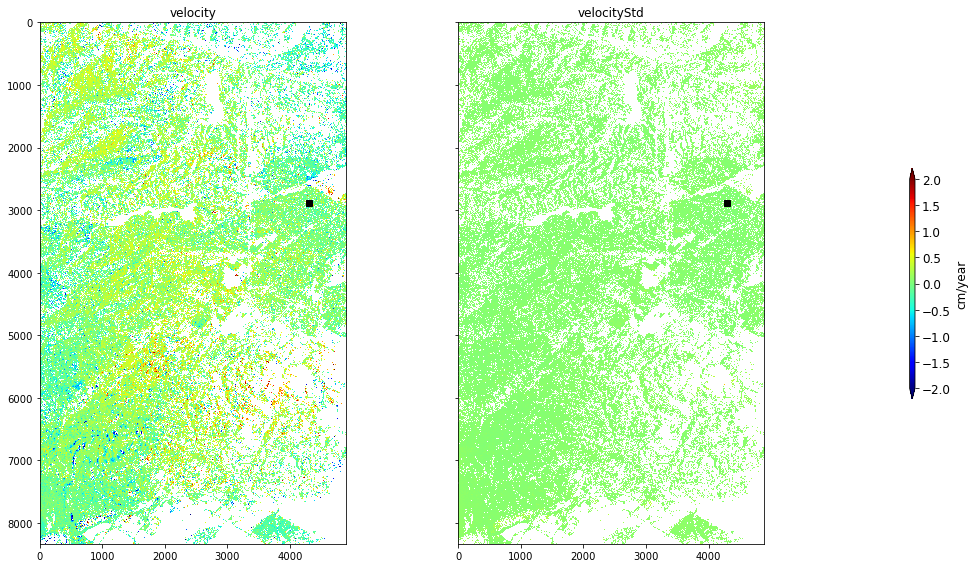

In [88]:
view.main('velocity.h5 --noverbose --vlim -2 2'.split())

view.py avgSpatialCoh.h5 --vlim 0.7 1.0 --noverbose


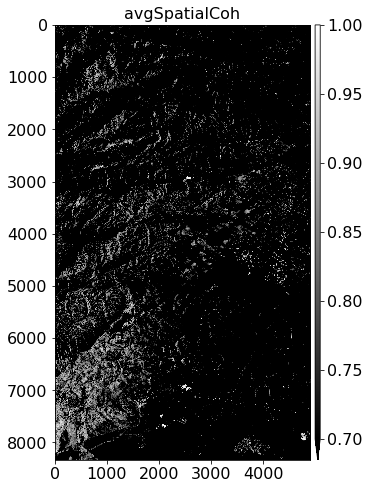

In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
# !generate_mask.py avgSpatialCoh.h5 -m 0.85 -o avgSpatialCohMask.h5
view.main('avgSpatialCoh.h5 --vlim 0.7 1.0 --noverbose'.split())

## Store Result Files

In [ ]:
mkdir run01
mv *.* ./run01/
mv ./run01/waterMask.h5 .
cp ./pic/Haywrd_05502_01-S2.cfg ./run01/

In [51]:
ls inputs/

geometryRadar.h5  Haywrd_05502_01-S2.cfg  ifgramStack.h5  smallbaselineApp.cfg
